# Exploratory Data Analysis on NETFLIX Daily Top 10 - Practice

### The Dataset obtained from Kaggle is about the Netflix Daily Top 10 Movies/TV Shows in the United States from 2020 - Mar 2022. 

### Goals to Achieve?
- Basic Understanding: shpe, info(), and describe()
- Data Cleaning and Imputation (if necessary)
- Histograms, Scatterplots, Line and bar Graphs
- Value Counts
- Exploring Insights
- Univariate Analysis
- Outlier Detection, Boxplots and Filtering
- Finding Correlation in Vaiables

### Extra Stuff, Just Tried to Implement 
- Decomposition
- Forecasting Variables using Time Series

Basically, try to learn more about the shows that went popular on the peak of COVID-19

### Columns
- As of - Date of recording
- Rank - Numerical rank, 1 being the highest
- Year to Date Rank 
- Last Week Rank - Numerical Rank from the past week
- Title
- Type - TV Show, Movie, etc.
- Netflix Exclusive - Whether if the title is a Netflix original
- Netflix Release Date - Date title was acquired/released by Netflix
- Days in Top 10
- Viewership Score



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from datetime import date, datetime
from matplotlib import style

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.tsa.holtwinters

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)


C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\835056019.py:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# importing the dataset, making As of variable the new index of df
df = pd.read_csv('netflix daily top 10.csv', index_col=0)
df.index = pd.to_datetime(df.index)
df.head(10)

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
As of,,,,,,,,,
2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
2020-04-01,8,7,5,Love is Blind,TV Show,Yes,"Feb 13, 2020",9,40
2020-04-01,9,8,-,Badland,Movie,NaN,"Mar 26, 2020",4,11


In [3]:
# getting shape of the dataset
df.shape

(7100, 9)

In [4]:
df.info()
# Netflix Exclusive variable contains null values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7100 entries, 2020-04-01 to 2022-03-11
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  7100 non-null   int64 
 1   Year to Date Rank     7100 non-null   object
 2   Last Week Rank        7100 non-null   object
 3   Title                 7100 non-null   object
 4   Type                  7100 non-null   object
 5   Netflix Exclusive     4599 non-null   object
 6   Netflix Release Date  7100 non-null   object
 7   Days In Top 10        7100 non-null   int64 
 8   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 554.7+ KB


In [5]:
df.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


### Data Cleaning and Possible Imputations

In [6]:
# sorting dates to year month and day
# df['As of'] = pd.to_datetime(df['As of'])
df['As of Year'] = pd.DatetimeIndex(df.index).year
df['As of Month'] = pd.DatetimeIndex(df.index).month
df['As of Day'] = pd.DatetimeIndex(df.index).day

df['Netflix Release Date'] = pd.to_datetime(df['Netflix Release Date'])
df['Netflix Release Date Year'] = pd.DatetimeIndex(df['Netflix Release Date']).year
df['Netflix Release Date Month'] = pd.DatetimeIndex(df['Netflix Release Date']).month
df['Netflix Release Date Day'] = pd.DatetimeIndex(df['Netflix Release Date']).day

In [7]:
# checking for unique values for Netflix Exclusive variable
df['Netflix Exclusive'].unique()

array(['Yes', nan], dtype=object)

In [8]:
# replacing nan values to 'No'
df['Netflix Exclusive'] = df['Netflix Exclusive'].fillna('No')

df[df['Netflix Exclusive'] != 'Yes'].head()


,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day
As of,,,,,,,,,,,,,,,
2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76,2020,4,1,2019,3,28
2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30,2020,4,1,2020,3,26
2020-04-01,9,8,-,Badland,Movie,No,2020-03-26,4,11,2020,4,1,2020,3,26
2020-04-02,3,3,2,All American,TV Show,No,2019-03-28,10,84,2020,4,2,2019,3,28
2020-04-02,6,4,-,Blood Father,Movie,No,2020-03-26,6,35,2020,4,2,2020,3,26


In [9]:
# check for unique values in other variables
df.Rank.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [10]:
df['Year to Date Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '10', '7', '8', '9', '-'],
      dtype=object)

In [11]:
df['Last Week Rank'].unique()

array(['1', '-', '2', '4', '5', '3', '8', '9', '6', '7', '10'],
      dtype=object)

In [12]:
# adding new columns for ranking related columns
# converting ranks to points, adding numerical value to the analysis
df['Rank_points'] = 10 - df['Rank'] + 1

In [13]:
ranking_object = {
    '-': 0,
    '1': 10,
    '2': 9,
    '3': 8,
    '4': 7,
    '5': 6,
    '6': 5,
    '7': 4,
    '8': 3,
    '9': 2,
    '10': 1,
}

df['Year to Date Rank Points'] = df['Year to Date Rank'].map(ranking_object)
df['Last Week Rank Points'] = df['Last Week Rank'].map(ranking_object)

In [14]:
# checking for unique values in Type
for type in df['Type'].unique():
    print(type)

TV Show
Movie
Stand-Up Comedy
Concert/Perf…


In [15]:
# using onehot encoding for Type variable
# REMEMBER THIS WILL BE A NEW DATAFRAME
encoded_df = pd.get_dummies(df, columns=['Type'])

# using label encoding to replace Netflix Exclusive variable
encoded_df['Netflix Exclusive'] = df['Netflix Exclusive'].replace('Yes', 1)
encoded_df['Netflix Exclusive'] = df['Netflix Exclusive'].replace('No', 0)

In [16]:
df.describe()

,Rank,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141,2020.711268,6.625352,15.557746,2019.976197,6.540986,13.530986,5.500000,5.229859,3.115070
std,2.872484,58.473789,213.861642,0.634512,3.444434,8.812515,1.477014,3.385814,9.444451,2.872484,3.209606,3.916062
min,1.000000,1.000000,1.000000,2020.000000,1.000000,1.000000,2007.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,3.000000,19.000000,2020.000000,4.000000,8.000000,2020.000000,4.000000,4.000000,3.000000,3.000000,0.000000
50%,5.500000,7.000000,50.000000,2021.000000,7.000000,15.000000,2020.000000,6.000000,14.000000,5.500000,5.000000,0.000000
75%,8.000000,18.000000,128.000000,2021.000000,10.000000,23.000000,2021.000000,9.000000,22.000000,8.000000,8.000000,7.000000
max,10.000000,428.000000,1474.000000,2022.000000,12.000000,31.000000,2022.000000,12.000000,31.000000,10.000000,10.000000,10.000000


In [17]:
# cleaned data
df.head(10)

# encoded_df.head(10)

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points
As of,,,,,,,,,,,,,,,,,,
2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,2020-03-20,9,90,2020,4,1,2020,3,20,10,10,10
2020-04-01,2,2,-,Ozark,TV Show,Yes,2017-07-21,5,45,2020,4,1,2017,7,21,9,9,0
2020-04-01,3,3,2,All American,TV Show,No,2019-03-28,9,76,2020,4,1,2019,3,28,8,8,9
2020-04-01,4,4,-,Blood Father,Movie,No,2020-03-26,5,30,2020,4,1,2020,3,26,7,7,0
2020-04-01,5,5,4,The Platform,Movie,Yes,2020-03-20,9,55,2020,4,1,2020,3,20,6,6,7
2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,2018-09-14,4,14,2020,4,1,2018,9,14,5,5,0
2020-04-01,7,10,-,Unorthodox,TV Show,Yes,2020-03-26,2,5,2020,4,1,2020,3,26,4,1,0
2020-04-01,8,7,5,Love is Blind,TV Show,Yes,2020-02-13,9,40,2020,4,1,2020,2,13,3,4,6
2020-04-01,9,8,-,Badland,Movie,No,2020-03-26,4,11,2020,4,1,2020,3,26,2,3,0


### Value Counts, Histograms, Scatterplots, Line and Bar Graphs

Totals and Breakdowns

In [18]:
# total number of unique shows in dataset
unique_len = len(df['Title'].unique())
print(f'There are a total of {unique_len} titles that made the Top 10 from 2020 to March 2022')

There are a total of 645 titles that made the Top 10 from 2020 to March 2022


In [19]:
# total number of unique shows released per year
df.groupby(df.index.year)['Title'].nunique()


As of
2020    299
2021    330
2022     74
Name: Title, dtype: int64

In [20]:
# total number of unique shows in the top 10 per month
# lower unique shows in a month can mean stronger shows holding the top 10
# can separate further by showing their genre

temp_df = df.resample(rule='M').nunique()
fig = px.line(temp_df, x=temp_df.index, y='Title', title='Total Number of Unique Titles in Top 10 per Month')
fig.show()

# fig = px.bar(temp_df, x=temp_df.index, y='Title', text='Title')
# fig.update_traces(textposition = 'outside')

Total number of unique shows in the Top 10 per month shows a downward trend. This may mean that shows overtime seem to stay longer

In [21]:
temp_df = df.resample(rule='W').nunique()
fig = px.line(temp_df, x=temp_df.index, y='Title', title='Total Number of Unique Titles in Top 10 per Week')
fig.show()

A further breakdown, we can see that the year 2022 has less spikes as compared to previous months

In [22]:
# totals of the months all these shows were released
# comes to show that not all of the shows in top are newly released
# a big chunk of the shows that make the top 10 are newly released
# READING CSV FILE AGAIN 

df2 = pd.read_csv('netflix daily top 10.csv', index_col=7)
df2.index = pd.to_datetime(df2.index)
temp_df2 = df2.resample(rule='M').nunique()
fig = px.bar(temp_df2, x=temp_df2.index, y='Title', text='Title')
fig.update_traces(textposition = 'outside')

The histogram shows that most of the top hits are those that are released more recently, with the earliest hit relased in 2007

In [23]:
# checking the oldest show that reached the top 10
# GOATED

my_date = date(2008, 1, 1)
date = df2.index.sort_values()[0]
df.loc[df['Netflix Release Date'] == date]

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points
As of,,,,,,,,,,,,,,,,,,
2020-07-15,10,-,-,The Office,TV Show,No,2007-01-15,1,1,2020,7,15,2007,1,15,1,0,0


Type breakdown

In [24]:
# genre breakdown
genre_count = df.groupby('Type')['Title'].nunique()
px.pie(genre_count, values='Title', names=genre_count.index)


Netflix Exclusive breakdown

In [25]:
# genre breakdown
genre_count = df.groupby('Netflix Exclusive')['Title'].nunique()
px.pie(genre_count, values='Title', names=genre_count.index)

Shows and Movies

In [26]:
# top shows based on Viewrship Score ALL TIME
temp_df3 = df.copy()
filtered = temp_df3.groupby('Title', group_keys=False).apply(lambda x: x.loc[x['Viewership Score'].idxmax()])
top_ten_viewer = filtered.sort_values('Viewership Score', ascending=False).head(10)
top_ten_viewer
fig = px.bar(top_ten_viewer, x=top_ten_viewer.index, y='Viewership Score', text='Viewership Score', title="Top 10 shows based on peak Viewership Scores")
fig.show()


In [27]:
# top shows based on Days in Top 10
temp_df4 = df.copy()
filtered = temp_df4.groupby('Title', group_keys=False).apply(lambda x: x.loc[x['Days In Top 10'].idxmax()])
top_ten_days = filtered.sort_values('Days In Top 10', ascending=False).head(10)
top_ten_days
fig = px.bar(top_ten_days, x=top_ten_days.index, y='Days In Top 10', text='Days In Top 10', title="Top 10 shows based on peak Days in Top 10")
fig.show()

In [28]:
# cocom = df[df['Title'] == 'Cocomelon']
# ck = df[df['Title'] == 'Cobra Kai']
# ozark = df[df['Title'] == 'Ozark']

In [29]:
# fig = go.Figure()
# fig.add_trace(go.Scatter(x=cocom.index, y=cocom['Days In Top 10'], mode='lines',  name = 'Cocomelon'))
# fig.add_trace(go.Scatter(x=ck.index, y=cocom['Days In Top 10'], mode='lines',  name = 'Cobra Kai'))
# fig.add_trace(go.Scatter(x=ozark.index, y=cocom['Days In Top 10'], mode='lines',  name = 'Ozark'))
# fig.show()

In [30]:
# top 10 in Rank Points sum
temp_df5 = df.copy()
filtered = temp_df5.groupby('Title').sum()
top_ten_points = filtered.sort_values('Rank_points', ascending=False).head(10)
top_ten_points
fig = px.bar(top_ten_points, x=top_ten_points.index, y='Rank_points', text='Rank_points', title="Top 10 shows based on highest Rank Points Sum")
fig.show()


C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\1321551515.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [31]:
# top 10 in Rank Points mean 
temp_df5 = df.copy()
filtered = temp_df5.groupby('Title').mean()
top_ten_points = filtered.sort_values('Rank_points', ascending=False).head(10)
top_ten_points['Rank_points'] = top_ten_points['Rank_points'].round(2)
top_ten_points
fig = px.bar(top_ten_points, x=top_ten_points.index, y='Rank_points', text='Rank_points', title="Top 10 shows based on highest Rank Points Mean")
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\3399113877.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Genres


In [82]:
# increase of genre popularity overtime
# looks like movies are likely to take a shows place when there is a drop in the show genre
# vice versa
pivot = pd.pivot_table(data=df, index=df.index, columns='Type', aggfunc='count')

# resampled weekly
resampled_pivot = pivot.resample(rule='w').sum()
movie_ser = resampled_pivot.loc[:, ('As of Day', 'Movie')]
show_ser = resampled_pivot.loc[:, ('As of Day', 'TV Show')]
stand_ser = resampled_pivot.loc[:, ('As of Day', 'Stand-Up Comedy')]
perf_ser = resampled_pivot.loc[:, ('As of Day', 'Concert/Perf…')]

data = {
    'date' : resampled_pivot.index,
    'movie' : movie_ser.values,
    'show' : show_ser.values,
    'stand' : stand_ser.values,
    'perf' : perf_ser.values
}
genre_growth = pd.DataFrame(data)
# movie_ser = pivot.loc[:, ('As of Day', 'Movie')]

fig = go.Figure()
fig.add_trace(go.Scatter(x=genre_growth.date, y=genre_growth.movie, mode='lines',  name = 'Movie'))
fig.add_trace(go.Scatter(x=genre_growth.date, y=genre_growth.show, mode='lines',  name = 'TV Show'))
fig.add_trace(go.Scatter(x=genre_growth.date, y=genre_growth.stand, mode='lines',  name = 'Stand Up'))
fig.add_trace(go.Scatter(x=genre_growth.date, y=genre_growth.perf, mode='lines',  name = 'Concerts'))
fig.show()

# fig = px.line(pivot, x=movie_ser.index, y=movie_ser.values, title='Genre Popularity Overtime')
# fig.show()

# genre_growth

,date,movie,show,stand,perf
0,2020-04-05,17.0,33.0,0.0,0.0
1,2020-04-12,20.0,50.0,0.0,0.0
2,2020-04-19,21.0,46.0,3.0,0.0
3,2020-04-26,17.0,53.0,0.0,0.0
4,2020-05-03,28.0,42.0,0.0,0.0
...,...,...,...,...,...
97,2022-02-13,20.0,50.0,0.0,0.0
98,2022-02-20,22.0,48.0,0.0,0.0
99,2022-02-27,17.0,53.0,0.0,0.0
100,2022-03-06,30.0,40.0,0.0,0.0


In [33]:
# increase of Netflix Exclusive popularity overtime
# actually looks A BIT similar to tv shows and movies, comes to show that Netflix are likely making TV shows?

pivot = pd.pivot_table(data=df, index=df.index, columns='Netflix Exclusive', aggfunc='count')

# resampled weekly
resampled_pivot = pivot.resample(rule='w').sum()
yes_ser = resampled_pivot.loc[:, ('As of Day', 'Yes')]
no_ser = resampled_pivot.loc[:, ('As of Day', 'No')]

data = {
    'date' : resampled_pivot.index,
    'yes' : yes_ser.values,
    'no' : no_ser.values,
}
exclusive_growth = pd.DataFrame(data)
# movie_ser = pivot.loc[:, ('As of Day', 'Movie')]

fig = go.Figure()
fig.add_trace(go.Scatter(x=exclusive_growth.date, y=exclusive_growth.yes, mode='lines',  name = 'Netflix Exclusive'))
fig.add_trace(go.Scatter(x=exclusive_growth.date, y=exclusive_growth.no, mode='lines',  name = 'Not Netflix Exclusive'))
fig.show()

# fig = px.line(pivot, x=movie_ser.index, y=movie_ser.values, title='Genre Popularity Overtime')
# fig.show()

In [34]:
# genre breakdown for top 10 in Viewership Score
px.histogram(top_ten_viewer, x='Type')

In [35]:
# genre breakdown for top 10 in Day in Top 10
px.histogram(top_ten_days, x='Type')

### Exploring More Insights

Next 4 cells focuses on the movies and shows that have reached the #1 spot

In [36]:
# Getting all top 1's and sorting them AT THEIR PEAKS
# shows how longest they have been while at the number 1 spot
# not much helpful i would say...

top_ones = df[df['Rank_points'] == 10]

filtered = top_ones.groupby('Title', group_keys=False).apply(lambda x: x.loc[x['Days In Top 10'].idxmax()])
top_ones_days = filtered.sort_values('Days In Top 10', ascending=False).head(10)
top_ones_days
fig = px.bar(top_ones_days, x=top_ones_days.index, y='Days In Top 10', text='Days In Top 10')
fig.show()

In [37]:
# Sorting top 1's based on their mean Viewership Score
top_view_mean = top_ones.groupby('Title').mean().sort_values('Viewership Score', ascending=False).head(10)
top_view_mean['Viewership Score'] = top_view_mean['Viewership Score'].round(2)
fig = px.bar(top_view_mean, x=top_view_mean.index, y='Viewership Score', text='Viewership Score')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\2429045318.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [38]:
# Sorting top 1's based on the sum of their Viewership Score
top_view_mean = top_ones.groupby('Title').sum().sort_values('Viewership Score', ascending=False).head(10)
top_view_mean['Viewership Score'] = top_view_mean['Viewership Score'].round(2)
fig = px.bar(top_view_mean, x=top_view_mean.index, y='Viewership Score', text='Viewership Score')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\3137179042.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [39]:
# total number of unique top 1's overtime

In [40]:
# top 10 titles are changing when it comes to means
# these are probably the shows that rate high but dont last long
# or maybe the ones that are always rated high whenever they are part of the top 10
# THIS TAKES INTO ACCOUNT THAT THEY ARE BEING COMPARED TO THEIR RESPECTIVE YEARS ONLY

year_to_rank = df.groupby('Title').mean()
year_to_rank_ten = year_to_rank.sort_values('Year to Date Rank Points', ascending=False).head(10)
year_to_rank_ten['Year to Date Rank Points'] = year_to_rank_ten['Year to Date Rank Points'].round(2)
fig = px.bar(year_to_rank_ten, x=year_to_rank_ten.index, y='Year to Date Rank Points', text='Year to Date Rank Points')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\856887943.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [41]:
# Cocomelon never even reached top 1...
points = df[df['Title'] == 'Cocomelon']['Rank_points'].max()
top = 10 - points + 1
print(f'Cocomelon\'s peak was only at Top {top}')

Cocomelon's peak was only at Top 3


In [83]:
# top shows with high scores in Year to Date Rank Points sum
year_to_rank = df.groupby('Title').sum()
year_to_rank_ten = year_to_rank.sort_values('Year to Date Rank Points', ascending=False).head(10)
year_to_rank_ten['Year to Date Rank Points'] = year_to_rank_ten['Year to Date Rank Points'].round(2)
fig = px.bar(year_to_rank_ten, x=year_to_rank_ten.index, y='Year to Date Rank Points', text='Year to Date Rank Points')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\1641342031.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [43]:
# top shows with high scores in mean Viewership Score
# tiger king probably did not last long but had high impact?
# tried to use mean for the impact? because takes into account times it appeared

mean_view_score = df.groupby('Title').mean()
top_ten_mean_viewership = mean_view_score.sort_values('Viewership Score', ascending=False).head(10)
top_ten_mean_viewership['Viewership Score'] = top_ten_mean_viewership['Viewership Score'].round(2)
fig = px.bar(top_ten_mean_viewership, x=top_ten_mean_viewership.index, y='Viewership Score', text='Viewership Score')
fig.show()



C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\4269582015.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [88]:
# top shows with high scores in Viewership Score sum
sum_view_score = df.groupby('Title').sum()
top_ten_sum_viewership = sum_view_score.sort_values('Viewership Score', ascending=False).head(10)
top_ten_sum_viewership['Viewership Score'] = top_ten_sum_viewership['Viewership Score'].round(2)
fig = px.bar(top_ten_mean_viewership, x=top_ten_sum_viewership.index, y='Viewership Score', text='Viewership Score')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\3259435727.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [45]:
# days in top vs Viewership Score for COCOMELON
# just to see if Viewership Score and Days in Top 10 are directly proportional
# Cocomelon shows a weak slope, maybe meaning its just there but never really ranking high?

cocomelon = df[df['Title'] == 'Cocomelon']
others = df[df['Title'] != 'Cocomelon']

fig = go.Figure()
fig.add_trace(go.Scatter(x=cocomelon['Days In Top 10'], y=cocomelon['Viewership Score'], mode='markers',  name = 'Cocomelon'))
fig.add_trace(go.Scatter(x=others['Days In Top 10'], y=others['Viewership Score'], mode='markers',  name = 'Others'))
fig.show()

In [46]:
# title with the longest streak in the top 10

In [47]:
# Recurring titles due to different seasons

In [48]:
# lag between release date and rise to top 10
# KEEP IN MIND, THERE ARE TITLES THAT ARE SIMILAR IN NAME WITH DIFFERENT RELEASE DATES
# MAY MEAN A RE-RELEASE OR SEQUEL

first_day_top = df[df['Days In Top 10'] == 1]
first_day_top.index
first_day_top['Average Lag'] = (first_day_top.index - first_day_top['Netflix Release Date'])
first_day_top['Average Lag'].describe()

# to see all titles with duplicated titles
# first_day_top[first_day_top['Title'].duplicated() == True]
# first_day_top[first_day_top['Title'] == 'Twilight']

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\495450611.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



count                            630
mean               191 days 17:36:00
std      533 days 16:56:45.580642120
min               -29 days +00:00:00
25%                  1 days 00:00:00
50%                  1 days 00:00:00
75%                  4 days 00:00:00
max               4930 days 00:00:00
Name: Average Lag, dtype: object

In [49]:
# There is a title that has reached top 10 earlier than its release... what
first_day_top[first_day_top['Average Lag'].dt.days < 0]

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points,Average Lag
As of,,,,,,,,,,,,,,,,,,,
2020-06-08,4,-,-,365 Days,Movie,Yes,2020-07-07,1,7,2020,6,8,2020,7,7,7,0,0,-29 days


In [93]:
# breakdown of titles that made the top 10 in less than a day
big_hit = first_day_top[first_day_top['Average Lag'].dt.days <= 1] 
big_hit['Title']

As of
2020-04-02    How to Fix a Drug Scandal
2020-04-02                 The Roommate
2020-04-04              Coffee & Kareem
2020-04-05             Angel Has Fallen
2020-04-07            The Big Show Show
                        ...            
2022-03-02                   Battleship
2022-03-02             Just Like Heaven
2022-03-03              Against the Ice
2022-03-04             The Weekend Away
2022-03-05                Pieces of Her
Name: Title, Length: 330, dtype: object

In [51]:
big_hit_unique = df.groupby('Netflix Exclusive')['Title'].nunique()
px.pie(big_hit_unique, values='Title', names=big_hit_unique.index)

In [52]:
big_hit_unique = df.groupby('Type')['Title'].nunique()
px.pie(big_hit_unique, values='Title', names=big_hit_unique.index)

In [53]:
big_hit.sort_values('Viewership Score', ascending=False).head(10)

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points,Average Lag
As of,,,,,,,,,,,,,,,,,,,
2021-02-13,1,-,-,To All the Boys Always and …,Movie,Yes,2021-02-12,1,10,2021,2,13,2021,2,12,10,0,0,1 days
2020-12-19,1,-,-,Ma Raineyâs Black Bottom,Movie,Yes,2020-12-18,1,10,2020,12,19,2020,12,18,10,0,0,1 days
2021-05-22,1,-,-,Army of the Dead,Movie,Yes,2021-05-21,1,10,2021,5,22,2021,5,21,10,0,0,1 days
2021-05-15,1,-,-,The Woman in the Window,Movie,Yes,2021-05-14,1,10,2021,5,15,2021,5,14,10,0,0,1 days
2020-11-25,1,-,-,Hillbilly Elegy,Movie,Yes,2020-11-24,1,10,2020,11,25,2020,11,24,10,0,0,1 days
2020-05-28,1,-,-,Jeffrey Epstein: Filthy Rich,TV Show,Yes,2020-05-27,1,10,2020,5,28,2020,5,27,10,0,0,1 days
2020-05-30,1,-,-,Space Force,TV Show,Yes,2020-05-29,1,10,2020,5,30,2020,5,29,10,0,0,1 days
2021-05-08,1,-,-,Jupiterâs Legacy,TV Show,Yes,2021-05-07,1,10,2021,5,8,2021,5,7,10,0,0,1 days
2021-05-01,1,-,-,The Mitchells vs. The Machines,Movie,Yes,2021-04-30,1,10,2021,5,1,2021,4,30,10,0,0,1 days


These are probably what you might call an 'insta-hit'?, probably those with the quickest rise to the Top 10

In [54]:
# Viewership score trend overtime to see the quality of those being released
# trend is pretty much the same when mean is used
resampled_week = df.resample(rule='w').sum()
resampled_week

fig = px.line(resampled_week, x=resampled_week.index, y='Viewership Score', title='Vierwership Score Sum per Week')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\2427914936.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [55]:
# Cause of dramatic drop in Jan to March 2022
# we can say that this was probably because of when Cocomelon and other shows hit its peak
# Noteable mentions: Cocomelon, Cobra Kai, Ozark, and propbably The Witcher, Emily in Paris\
# Genres are all TV Shows

my_date = datetime(2021, 12, 31)
titles_on_drop = df.loc[df.index > my_date]
titles_on_drop.sort_values('Days In Top 10', ascending=True)

filtered = titles_on_drop.groupby('Title', group_keys=False).apply(lambda x: x.loc[x['Viewership Score'].idxmax()])
top_ten_viewer = filtered.sort_values('Viewership Score', ascending=False).head(10)
top_ten_viewer

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points
Title,,,,,,,,,,,,,,,,,,
Cocomelon,9,-,-,Cocomelon,TV Show,No,2020-06-01,428,1474,2022,3,1,2020,6,1,2,0,0
Cobra Kai,9,7,5,Cobra Kai,TV Show,No,2020-08-28,81,582,2022,1,28,2020,8,28,2,4,6
Ozark,7,7,8,Ozark,TV Show,Yes,2017-07-21,89,536,2022,3,1,2017,7,21,4,4,3
Sweet Magnolias,9,6,3,Sweet Magnolias,TV Show,Yes,2020-05-19,45,344,2022,3,2,2020,5,19,2,5,8
Love is Blind,5,6,6,Love is Blind,TV Show,Yes,2020-02-13,46,312,2022,3,11,2020,2,13,6,5,5
Too Hot to Handle,7,7,3,Too Hot to Handle,TV Show,Yes,2020-04-17,48,297,2022,2,1,2020,4,17,4,4,8
The Witcher,10,9,10,The Witcher,TV Show,Yes,2019-12-20,45,288,2022,1,27,2019,12,20,1,2,1
Emily in Paris,10,10,7,Emily in Paris,TV Show,Yes,2020-10-02,48,287,2022,1,18,2020,10,2,1,1,4
The Queen of Flow,10,-,6,The Queen of Flow,TV Show,Yes,2018-11-09,44,250,2022,1,4,2018,11,9,1,0,5


In [56]:
# Cocomelons start and end in the top 10
df.loc[df['Title'] == 'Cocomelon']

,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score,As of Year,As of Month,As of Day,Netflix Release Date Year,Netflix Release Date Month,Netflix Release Date Day,Rank_points,Year to Date Rank Points,Last Week Rank Points
As of,,,,,,,,,,,,,,,,,,
2020-08-28,9,-,-,Cocomelon,TV Show,No,2020-06-01,1,2,2020,8,28,2020,6,1,2,0,0
2020-08-29,9,9,-,Cocomelon,TV Show,No,2020-06-01,2,4,2020,8,29,2020,6,1,2,2,0
2020-08-30,9,9,-,Cocomelon,TV Show,No,2020-06-01,3,6,2020,8,30,2020,6,1,2,2,0
2020-08-31,9,9,-,Cocomelon,TV Show,No,2020-06-01,4,8,2020,8,31,2020,6,1,2,2,0
2020-09-01,6,9,-,Cocomelon,TV Show,No,2020-06-01,5,13,2020,9,1,2020,6,1,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,5,6,-,Cocomelon,TV Show,No,2020-06-01,424,1466,2022,1,28,2020,6,1,6,5,0
2022-01-29,8,5,8,Cocomelon,TV Show,No,2020-06-01,425,1469,2022,1,29,2020,6,1,3,6,3
2022-02-01,9,-,7,Cocomelon,TV Show,No,2020-06-01,426,1471,2022,2,1,2020,6,1,2,0,4


### Univariate Analysis

statistical Analysis
- mean
- median
- mode
- range
- variance
- standard deviation

In [57]:
#short decription for numeric columns
numeric = df.loc[:, ['Title', 'Days In Top 10', 'Viewership Score', 'Rank_points', 'Year to Date Rank Points', 'Last Week Rank Points']]
numeric.describe()

,Days In Top 10,Viewership Score,Rank_points,Year to Date Rank Points,Last Week Rank Points
count,7100.000000,7100.000000,7100.000000,7100.000000,7100.000000
mean,24.123662,122.790141,5.500000,5.229859,3.115070
std,58.473789,213.861642,2.872484,3.209606,3.916062
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.000000,19.000000,3.000000,3.000000,0.000000
50%,7.000000,50.000000,5.500000,5.000000,0.000000
75%,18.000000,128.000000,8.000000,8.000000,7.000000
max,428.000000,1474.000000,10.000000,10.000000,10.000000


frequncy distribution

In [58]:
numeric['Days In Top 10'].plot(kind='hist', backend='plotly')

In [59]:
numeric['Viewership Score'].plot(kind='hist', backend='plotly')

outlier detection

In [60]:
# boxplot of Days In Top 10
filtered = numeric.groupby('Title', group_keys=False).apply(lambda x: x.loc[x['Days In Top 10'].idxmax()])
# fig = px.box(filtered, y='Days In Top 10')
# fig.show()

fig = px.box(numeric, y='Days In Top 10')
fig.show()

In [61]:
# boxplot of Viewership Score
filtered = numeric.groupby('Title', group_keys=False).apply(lambda x: x.loc[x['Viewership Score'].idxmax()])
# fig = px.box(filtered, y='Viewership Score')
# fig.show()

fig = px.box(numeric, y='Viewership Score')
fig.show()

extra boxplots

In [62]:
# boxplot of Average Lag
first_day_top['Average Lag Int'] = first_day_top['Average Lag'].dt.days
first_day_top
fig = px.box(first_day_top, y='Average Lag Int')
fig.show()

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\776833665.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
numeric_notitle = df.loc[:, ['Days In Top 10', 'Viewership Score', 'Rank_points', 'Year to Date Rank Points', 'Last Week Rank Points']]

In [64]:
def calc_iqr(key, col):
    quantile1 = numeric_notitle[key].quantile(0.25)
    quantile3 = numeric_notitle[key].quantile(0.75)
    IQR = quantile3 - quantile1
    lower_bound = quantile1 - 1.5*IQR
    upper_bound = quantile3 + 1.5*IQR
    if (col > lower_bound) & (col < upper_bound):
        return col
    else:
        return np.nan

In [65]:

no_out_vs = numeric_notitle['Viewership Score'].apply(lambda x: calc_iqr('Viewership Score',x))
no_out_days = numeric_notitle['Days In Top 10'].apply(lambda x: calc_iqr('Days In Top 10',x))
no_out_rp = numeric_notitle['Rank_points'].apply(lambda x: calc_iqr('Rank_points',x))
no_out_yearp = numeric_notitle['Year to Date Rank Points'].apply(lambda x: calc_iqr('Year to Date Rank Points',x))
no_out_weekp = numeric_notitle['Last Week Rank Points'].apply(lambda x: calc_iqr('Last Week Rank Points',x))

In [66]:
numeric_clean = numeric_notitle.copy()
numeric_clean['filtered VS'] = no_out_vs
# numeric_clean['filtered VS'].isna().sum
numeric_clean['filtered days'] = no_out_days
# numeric_clean['filtered days'].isna().sum
numeric_clean['filtered Rankp'] = no_out_rp
# numeric_clean['filtered Rankp'].isna().sum
numeric_clean['filtered Yearp'] = no_out_yearp
# numeric_clean['filtered Yearp'].isna().sum
numeric_clean['filtered Weekp'] = no_out_weekp
# numeric_clean['filtered Weekp'].isna().sum

### Multivariate Analysis

correlation

C:\Users\daniel.cañamo\AppData\Local\Temp\ipykernel_20272\219072921.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

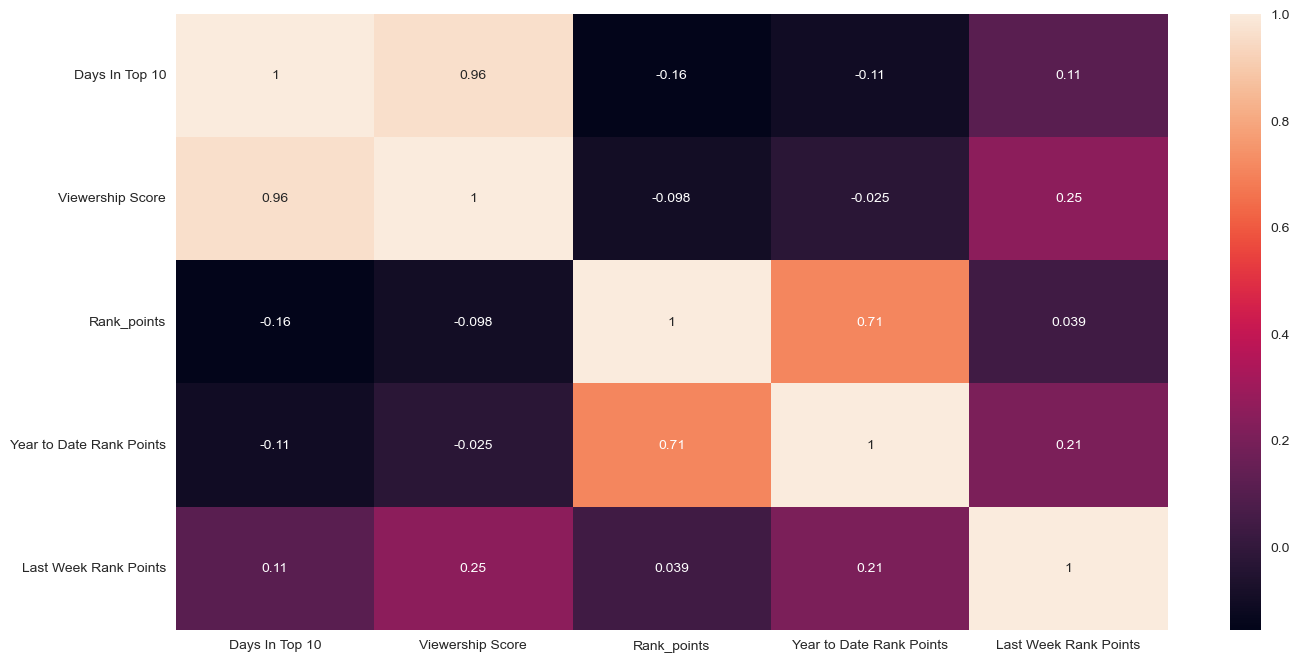

In [67]:
# correlation matrix
sns.heatmap(numeric.corr(), annot=True)


clean check


In [68]:
(numeric_notitle < 0).sum().sum()

0

In [69]:
numeric_notitle.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7100 entries, 2020-04-01 to 2022-03-11
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Days In Top 10            7100 non-null   int64
 1   Viewership Score          7100 non-null   int64
 2   Rank_points               7100 non-null   int64
 3   Year to Date Rank Points  7100 non-null   int64
 4   Last Week Rank Points     7100 non-null   int64
dtypes: int64(5)
memory usage: 332.8 KB


### Decomposition

In [70]:
numeric_notitle.sort_index(inplace=True)
# decomp = numeric_notitle.copy()
decomp = numeric_notitle.resample(rule='D').mean()

In [71]:
# avoided quick method
# seasonal_decomp = seasonal_decompose(decomp_df, model='additive')
# seasonal_decomp.plot()


trend, seasonality, and noise - Viewership Score

In [72]:
y = decomp['Viewership Score']
seasonal_df = y.to_frame()

In [73]:
seasonal_df['trend'] = seasonal_df['Viewership Score'].rolling(window=7, center=True).mean()

seasonal_df["detrended"] = seasonal_df["Viewership Score"] - seasonal_df["trend"]

seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["day"] = seasonal_df.index.day
seasonal_df["seasonality"] = seasonal_df.groupby("day")["detrended"].transform("mean")

seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

array([<Axes: xlabel='As of'>, <Axes: xlabel='As of'>,
       <Axes: xlabel='As of'>, <Axes: xlabel='As of'>], dtype=object)

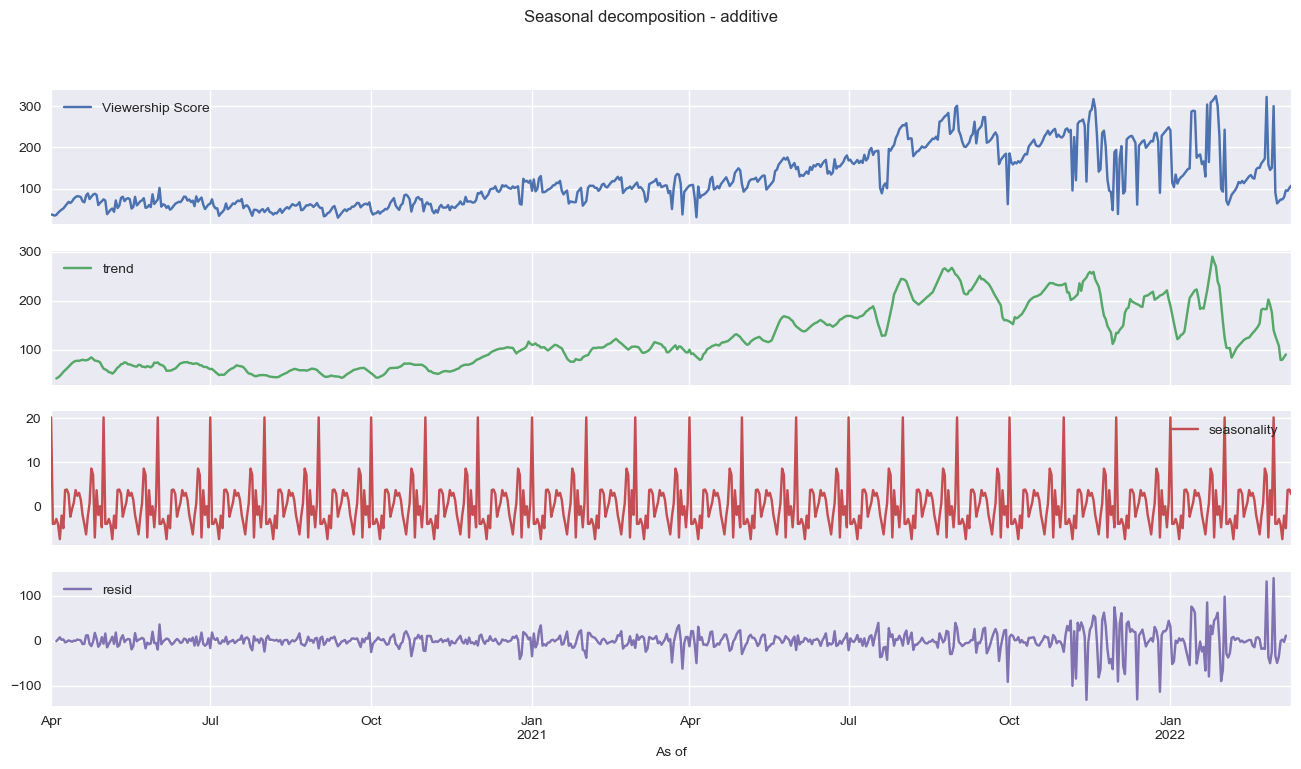

In [74]:
(
    seasonal_df
    .loc[:, ["Viewership Score", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
)

for Days In Top 10

In [75]:
z = decomp['Days In Top 10']
seasonal_df = z.to_frame()

In [76]:
seasonal_df['trend'] = seasonal_df['Days In Top 10'].rolling(window=7, center=True).mean()

seasonal_df["detrended"] = seasonal_df["Days In Top 10"] - seasonal_df["trend"]

seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["day"] = seasonal_df.index.day
seasonal_df["seasonality"] = seasonal_df.groupby("day")["detrended"].transform("mean")

seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

array([<Axes: xlabel='As of'>, <Axes: xlabel='As of'>,
       <Axes: xlabel='As of'>, <Axes: xlabel='As of'>], dtype=object)

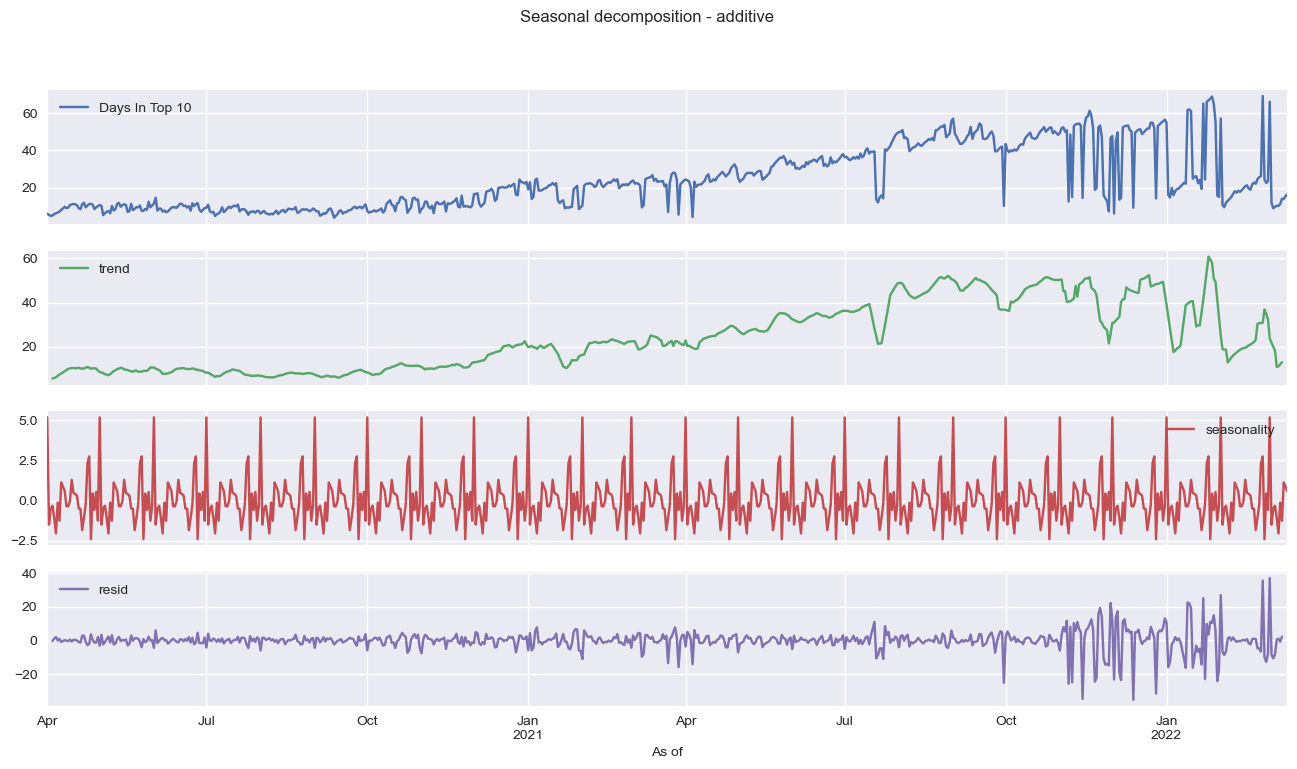

In [77]:
(
    seasonal_df
    .loc[:, ["Days In Top 10", "trend", "seasonality", "resid"]]
    .plot(subplots=True, title="Seasonal decomposition - additive")
)

### Forecasting 

testing triple exponential smoothing, additive

In [78]:
decomp2 = numeric_notitle.resample(rule='w').mean()

In [79]:
# for day
# train = decomp[decomp.index < datetime(2022, 1, 1)]
# test = decomp[decomp.index >= datetime(2022, 1, 1)]

# for week 
train = decomp2[decomp2.index < datetime(2022, 1, 1)]
test = decomp2[decomp2.index >= datetime(2022, 1, 1)]

d:\anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning:

overflow encountered in matmul



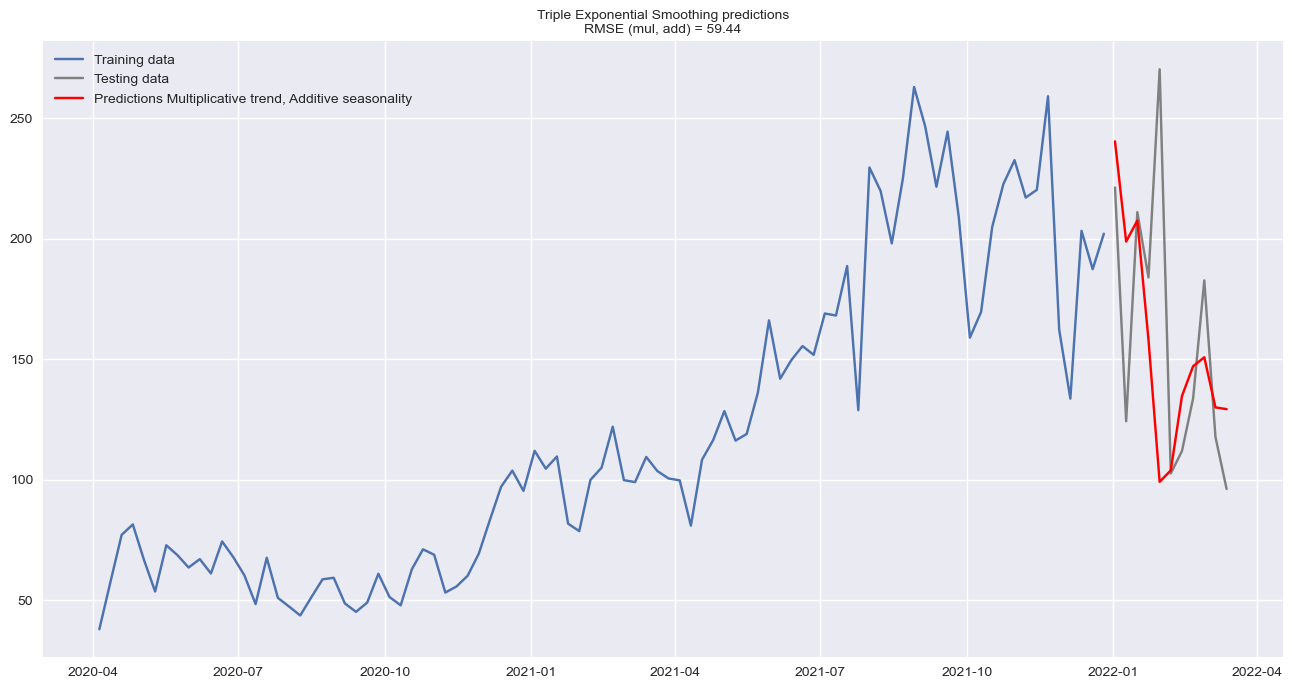

In [80]:
model_mul_add = statsmodels.tsa.holtwinters.ExponentialSmoothing(train['Viewership Score'], trend='mul', seasonal='add', seasonal_periods=17)
# best seasonal = 15
results_mul_add = model_mul_add.fit(smoothing_level=.055, smoothing_trend=0.25, smoothing_seasonal=1.005)
# results_mul_add = model_mul_add.fit(smoothing_level=0.055, smoothing_trend=0.25, smoothing_seasonal=0.95)
predictions_mul_add = results_mul_add.forecast(steps = len(test.index))

rmse_mul_add = mean_squared_error(test['Viewership Score'], predictions_mul_add, squared=False)

plt.title(f'Triple Exponential Smoothing predictions\nRMSE (mul, add) = {np.round(rmse_mul_add, 2)}', size=10)
plt.plot(train['Viewership Score'], label='Training data')
plt.plot(test['Viewership Score'], color='gray', label='Testing data')
plt.plot(predictions_mul_add, color='red', label='Predictions Multiplicative trend, Additive seasonality')
plt.legend()